## Self-Driving Car Project

### Data Preparation

In [3]:
# import required libriaries for a data load
import os
import pandas as pd

# Load the labels file
column_name = ['file_name', 'class_name', 'x','y','width','height']
df = pd.read_csv('labels.csv', header=None, names = column_name,
                 dtype = {'file_name': 'string'})
df.head()

,file_name,class_name,x,y,width,height
0,00000000,pickup_truck,213,34,255,50
1,00000000,car,194,78,273,122
2,00000000,car,155,27,183,35
3,00000000,articulated_truck,43,25,109,55
4,00000000,car,106,32,124,45


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351549 entries, 0 to 351548
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   file_name   351549 non-null  string
 1   class_name  351549 non-null  object
 2   x           351549 non-null  int64 
 3   y           351549 non-null  int64 
 4   width       351549 non-null  int64 
 5   height      351549 non-null  int64 
dtypes: int64(4), object(1), string(1)
memory usage: 16.1+ MB


In [5]:
!unzip /content/Images.zip -d /content/images_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/images_data/Images/00000457.jpg  
  inflating: /content/images_data/__MACOSX/Images/._00000457.jpg  
  inflating: /content/images_data/Images/00001749.jpg  
  inflating: /content/images_data/__MACOSX/Images/._00001749.jpg  
  inflating: /content/images_data/Images/00002240.jpg  
  inflating: /content/images_data/__MACOSX/Images/._00002240.jpg  
  inflating: /content/images_data/Images/00004631.jpg  
  inflating: /content/images_data/__MACOSX/Images/._00004631.jpg  
  inflating: /content/images_data/Images/00004157.jpg  
  inflating: /content/images_data/__MACOSX/Images/._00004157.jpg  
  inflating: /content/images_data/Images/00003638.jpg  
  inflating: /content/images_data/__MACOSX/Images/._00003638.jpg  
  inflating: /content/images_data/Images/00002526.jpg  
  inflating: /content/images_data/__MACOSX/Images/._00002526.jpg  
  inflating: /content/images_data/Images/00005249.jpg  
  inflating: /content/images_dat

<ipython-input-6-80d8016f0de3>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(1, 3, index + 1)


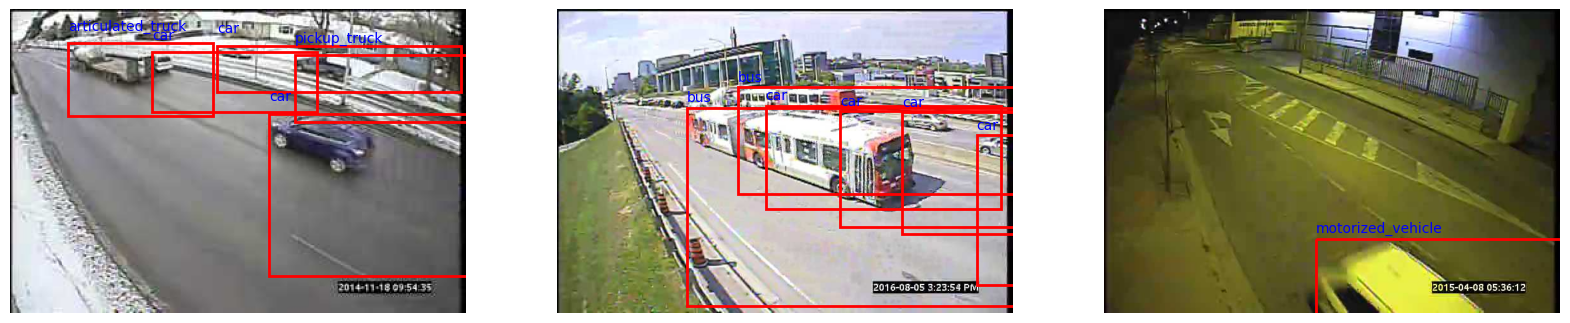

In [6]:
# visualize three examples with a box boundaries
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

image_folder = '/content/images_data/Images'
image_list = ['00000000', '00000001','00000002']


plt.figure(figsize=(20, 6))
plt.title("Example of Bounding Boxes for Image Objects")
plt.axis('off')
for index, image_name in enumerate(image_list):
    ax = plt.subplot(1, 3, index + 1)
    # Load the image
    image_file = Image.open(f'{image_folder}/{image_name}.jpg')

    # Example image and bounding box data

    bounding_box_df = df.query("file_name	== @image_name")[['x','y','width','height','class_name']]
    # Convert each row to a dictionary
    bounding_box_list = []

    for index, row in bounding_box_df .iterrows():
        row_dict = row.to_dict()
        bounding_box_list.append(row_dict)


    # Display the image
    ax.imshow(image_file)
    ax.axis('off')  # Hide axes
    # Create a Rectangle patch
    for item in bounding_box_list:

       ax.add_patch(patches.Rectangle(
            (item['x'], item['y']),
            item['width'],
            item['height'],
            linewidth=2,
            edgecolor='r',
            facecolor='none'
        ))
       plt.text(item['x'], (item['y']-10), item['class_name'], c = '#0000FF', fontsize=10,)

    # Display the plot

plt.show()


### Inference from a Label Dataset
1. There are multiple objects per each image.
2. The dataset contains classes that are not encoded.
3. Bounding Box coordinates are not normilized.
4. Bounding box for each object is too large.

In [7]:
# Encode classes in the labels dataset
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['class_name'])
df['class_name_numeric']=le.transform(df['class_name'])

df.head()

,file_name,class_name,x,y,width,height,class_name_numeric
0,00000000,pickup_truck,213,34,255,50,8
1,00000000,car,194,78,273,122,3
2,00000000,car,155,27,183,35,3
3,00000000,articulated_truck,43,25,109,55,0
4,00000000,car,106,32,124,45,3


In [8]:
# Read Images and create a dataframe with an image width and height

# Initialize an empty list to store image data
image_data = []

# Iterate over each file in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):  # Check for image file extensions
        # Open the image file
        with Image.open(os.path.join(image_folder, filename)) as img:
            # Get image dimensions
            width, height = img.size
            # Append image data to the list
            filename_split = filename.split(".")[0]
            image_data.append({'file_name': filename_split, 'image_width': width, 'image_height': height})

# Create a DataFrame from the image data
sorted_image_data = sorted(image_data, key=lambda x: x['file_name'])
df_images = pd.DataFrame(sorted_image_data)

# convert a type of a file_name to a string to be used in a join
df_images['file_name'] = df_images['file_name'].astype('string')

# Display the DataFrame
df_images.head()

,file_name,image_width,image_height
0,00000000,342,228
1,00000001,720,480
2,00000002,720,480
3,00000003,720,480
4,00000004,720,480


In [9]:
# check min/max size of image data
df_images.describe()

,image_width,image_height
count,5626.000000,5626.000000
mean,641.793103,427.862069
std,153.134112,102.089408
min,342.000000,228.000000
25%,720.000000,480.000000
50%,720.000000,480.000000
75%,720.000000,480.000000
max,720.000000,480.000000


In [10]:
# to check the maximum file name in both datasets
print(f"Max file name in a level dataset is {df['file_name'].max()}")
print(f"Max file name in an image dataset is {df_images['file_name'].max()}")

Max file name in a level dataset is 00110592
Max file name in an image dataset is 00005657


### Inference from an image dataset
1. Images have different width and height.
2. Min width is 342 and a maximim is 720. Mean width value is 641.
3. Image data contains less number of images compare to a label dataset.
4. In order to normalize bounding box coordinates, image width and height needs to be used.

In [11]:
# join labels and image dataframes
joined_df = df_images.merge(df, on='file_name', how='left')
joined_df.head()

,file_name,image_width,image_height,class_name,x,y,width,height,class_name_numeric
0,00000000,342,228,pickup_truck,213,34,255,50,8
1,00000000,342,228,car,194,78,273,122,3
2,00000000,342,228,car,155,27,183,35,3
3,00000000,342,228,articulated_truck,43,25,109,55,0
4,00000000,342,228,car,106,32,124,45,3


In [12]:
# check if the joined data frame contains nulls
joined_df.isna().sum()

file_name             0
image_width           0
image_height          0
class_name            0
x                     0
y                     0
width                 0
height                0
class_name_numeric    0
dtype: int64

In [13]:
# check class destribution across all availalble images
joined_df['class_name'].value_counts()

class_name
car                      12076
pickup_truck              2136
motorized_vehicle         1295
bus                        561
work_van                   462
articulated_truck          461
pedestrian                 340
single_unit_truck          303
bicycle                    130
non-motorized_vehicle      108
motorcycle                  95
Name: count, dtype: int64

In [14]:
# Function to normalize bounding box coordinates
def normalize_bbox(row):
    x_center = row['x'] / row['image_width']
    y_center = row['y'] / row['image_height']
    norm_width = row['width'] / row['image_width']
    norm_height = row['height'] / row['image_height']

    return pd.Series([x_center, y_center, norm_width, norm_height])

In [15]:
# Normalize bounding box coordinates
joined_df[['x_center', 'y_center', 'norm_width', 'norm_height']] = joined_df.apply(normalize_bbox, axis=1)
joined_df.head()

,file_name,image_width,image_height,class_name,x,y,width,height,class_name_numeric,x_center,y_center,norm_width,norm_height
0,00000000,342,228,pickup_truck,213,34,255,50,8,0.622807,0.149123,0.745614,0.219298
1,00000000,342,228,car,194,78,273,122,3,0.567251,0.342105,0.798246,0.535088
2,00000000,342,228,car,155,27,183,35,3,0.453216,0.118421,0.535088,0.153509
3,00000000,342,228,articulated_truck,43,25,109,55,0,0.125731,0.109649,0.318713,0.241228
4,00000000,342,228,car,106,32,124,45,3,0.309942,0.140351,0.362573,0.197368


In [16]:
# create a subset of a dataframe with only required columns
prepared_df = joined_df[['file_name','class_name_numeric','x_center', 'y_center', 'norm_width', 'norm_height']]

# create an output folder for the label files
output_dir = 'labels'
os.makedirs(output_dir, exist_ok=True)

# Group by filename and write each file's annotations
for filename, group in prepared_df.groupby('file_name'):
    output_path = os.path.join(output_dir, f'{filename}.txt')

    with open(output_path, 'w') as f:
        for _, row in group.iterrows():
            line = f"{row['class_name_numeric']} {row['x_center']} {row['y_center']} {row['norm_width']} {row['norm_height']}\n"
            f.write(line)

In [17]:
# Split data in train/val/test for a model training

import shutil
import random
from sklearn.model_selection import train_test_split

# create a set of all images in a joined dataset
images = list(set(joined_df['file_name']))


# Paths
images_dir = '/content/images_data/Images'
labels_dir = '/content/labels'
output_dir = '/content/dataset'

# Create directories if they do not exist
os.makedirs(os.path.join(output_dir, 'train/images'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train/labels'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test/labels'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test/images'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val/images'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val/labels'), exist_ok=True)

# Split data into train, validation, and test sets
train_images, test_images = train_test_split(images, test_size=0.1, random_state=43)
train_images, val_images = train_test_split(train_images, test_size=0.2, random_state=43)  # 0.2 * 0.9 = 0.18


# Function to copy images and labels to the respective folders
def copy_files(image_list, subset):
    for image in image_list:
        image_name = f"{image}.jpg"
        label_name = f"{image}.txt"

        shutil.copy(os.path.join(images_dir, image_name), os.path.join(output_dir, f'{subset}/images', image_name))
        shutil.copy(os.path.join(labels_dir, label_name), os.path.join(output_dir, f'{subset}/labels', label_name))

# Copy files to train, val, and test directories
copy_files(train_images, 'train')
copy_files(val_images, 'val')
copy_files(test_images, 'test')


### YOLO Model Training

In [18]:
# Pip install ultralytics and dependencies and check software and hardware
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [19]:
# create a yaml file with paths to a data and class names
import yaml

# Define the data
data = {
    'path': '/content/dataset',
    'train': 'train/images',
    'val': 'val/images',
    'test': 'test/images',
    'names': list(le.classes_)}

yaml_file_path = '/content/data.yaml'
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

In [20]:
# Load a pretrained model and train it on the image dataset
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # load a pretrained model

# Use the model
model.train(data=yaml_file_path, epochs=10, imgsz=640, batch=16)  # train the model

100%|██████████| 6.25M/6.25M [00:00<00:00, 295MB/s]


Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tr

100%|██████████| 755k/755k [00:00<00:00, 128MB/s]


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/dataset/train/labels... 4050 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4050/4050 [00:05<00:00, 743.78it/s] 


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/dataset/val/labels... 1013 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1013/1013 [00:01<00:00, 578.40it/s]

val: New cache created: /content/dataset/val/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.56G      2.057      3.351      2.268          3        640: 100%|██████████| 254/254 [01:24<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.49it/s]


                   all       1013       3025      0.799      0.119     0.0823     0.0443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.37G      1.472      2.333      1.751          4        640: 100%|██████████| 254/254 [01:17<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.50it/s]


                   all       1013       3025      0.861      0.149      0.155     0.0936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.35G      1.301      1.912      1.602          5        640: 100%|██████████| 254/254 [01:16<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.11it/s]


                   all       1013       3025       0.72      0.188      0.198      0.133

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.33G      1.161      1.637      1.483          6        640: 100%|██████████| 254/254 [01:15<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.56it/s]


                   all       1013       3025      0.599      0.243      0.211       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.35G      1.051      1.451      1.397          4        640: 100%|██████████| 254/254 [01:16<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.08it/s]


                   all       1013       3025      0.541      0.299      0.273      0.199

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.35G      0.968      1.293       1.33          5        640: 100%|██████████| 254/254 [01:15<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:07<00:00,  4.19it/s]


                   all       1013       3025      0.376      0.358      0.337      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.32G     0.8994      1.197      1.281          4        640: 100%|██████████| 254/254 [01:16<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.97it/s]

                   all       1013       3025      0.391      0.444      0.369      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.34G     0.8427      1.123      1.233         10        640: 100%|██████████| 254/254 [01:13<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.12it/s]


                   all       1013       3025       0.45      0.419      0.399      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.34G     0.7847      1.036      1.192          6        640: 100%|██████████| 254/254 [01:16<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:06<00:00,  4.68it/s]


                   all       1013       3025      0.485      0.467      0.435       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.33G     0.7445     0.9985      1.167          7        640: 100%|██████████| 254/254 [01:16<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  3.05it/s]

                   all       1013       3025      0.478      0.479      0.445      0.351



10 epochs completed in 0.243 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:10<00:00,  2.93it/s]


                   all       1013       3025       0.48      0.476      0.445       0.35
     articulated_truck         83         91      0.507      0.566      0.525      0.366
               bicycle         11         13      0.378      0.769       0.58      0.423
                   bus         91        104      0.489      0.788      0.752      0.625
                   car        826       2018      0.695      0.877      0.865      0.743
            motorcycle         15         15      0.236      0.268      0.242      0.199
     motorized_vehicle        173        208      0.301      0.298      0.235      0.166
 non-motorized_vehicle         25         25          1          0     0.0603     0.0234
            pedestrian         29         51      0.337      0.333       0.31      0.173
          pickup_truck        277        367        0.6      0.761      0.768      0.682
     single_unit_truck         43         44       0.28      0.205      0.201      0.145
              work_va

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d3048a8e680>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

(-0.5, 2399.5, 1199.5, -0.5)

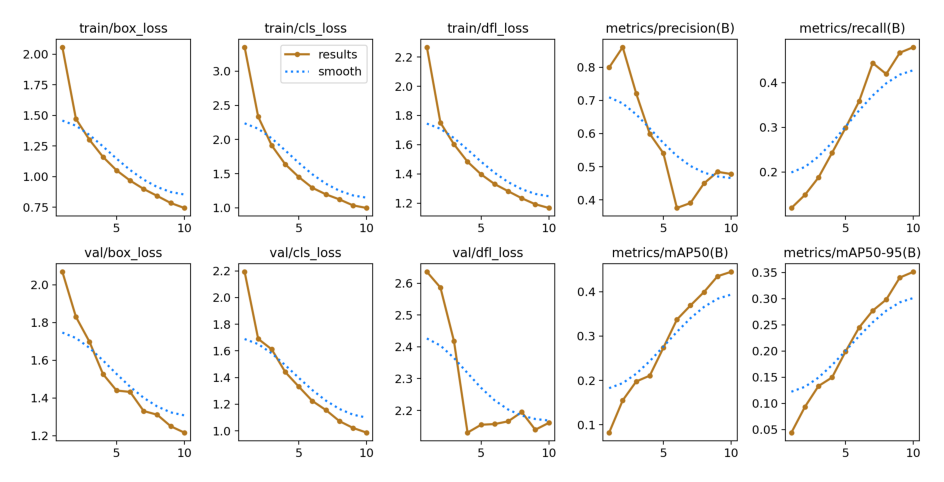

In [33]:
# visualize epoch training performance metrics
import cv2
result_file_path = '/content/runs/detect/train/results.png'
image = cv2.imread(result_file_path)
plt.figure(figsize=(12, 6))
plt.imshow(image)
plt.axis('off')

In [21]:
# Save a custom trained model with the best weight to a separate variable
custom_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Run the evaluation and save it to a separate variable
results = custom_model.val(data='/content/data.yaml')

Ultralytics YOLOv8.2.69 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,007,793 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/val/labels.cache... 1013 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1013/1013 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 64/64 [00:16<00:00,  3.91it/s]


                   all       1013       3025      0.478       0.48      0.445       0.35
     articulated_truck         83         91      0.509      0.569      0.525      0.366
               bicycle         11         13      0.377      0.769      0.581      0.423
                   bus         91        104      0.488      0.788      0.753      0.626
                   car        826       2018      0.694      0.877      0.865      0.743
            motorcycle         15         15      0.257      0.301      0.242      0.199
     motorized_vehicle        173        208      0.302      0.304      0.235      0.165
 non-motorized_vehicle         25         25          1          0     0.0603     0.0234
            pedestrian         29         51      0.332      0.333      0.309      0.172
          pickup_truck        277        367      0.594      0.763      0.768      0.682
     single_unit_truck         43         44      0.251      0.205      0.201      0.144
              work_va

In [22]:
# Print specific metrics
print("Class indices with average precision:", results.ap_class_index)
#print("Average precision for all classes:", results.box.all_ap)
print("Mean average precision at IoU=0.50:", results.box.map50)
print("Mean recall:", results.box.mr)

Class indices with average precision: [ 0  1  2  3  4  5  6  7  8  9 10]
Mean average precision at IoU=0.50: 0.4447522847882666
Mean recall: 0.47996660039617717


(-0.5, 2999.5, 2249.5, -0.5)

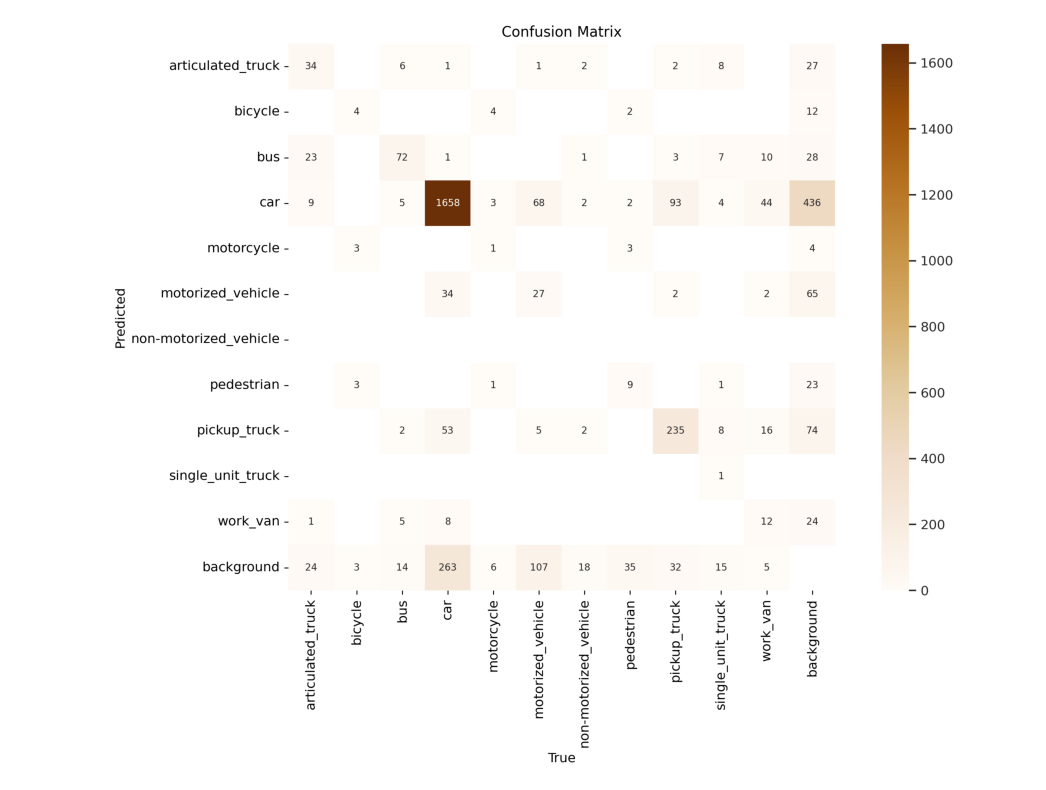

In [36]:
# visualize confusion metrics
confusion_metrics_path = '/content/runs/detect/val/confusion_matrix.png'
image = cv2.imread(confusion_metrics_path)
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.axis('off')

In [23]:
import random
import glob
test_images_path = f"/content/dataset/test/images"
test_images = glob.glob(f"{test_images_path}/*.jpg")

num_to_select = 9
test_images_random_pick  = random.sample(test_images, num_to_select)

In [24]:
# predict on a subset of a test data
predict_results = model.predict(test_images_random_pick, save=True, imgsz=320, conf=0.3)



0: 320x320 1 pickup_truck, 33.2ms
1: 320x320 1 bus, 3 cars, 33.2ms
2: 320x320 1 car, 33.2ms
3: 320x320 1 car, 33.2ms
4: 320x320 1 car, 33.2ms
5: 320x320 1 car, 33.2ms
6: 320x320 1 articulated_truck, 3 cars, 33.2ms
7: 320x320 2 cars, 33.2ms
8: 320x320 1 car, 33.2ms
Speed: 1.7ms preprocess, 33.2ms inference, 2.7ms postprocess per image at shape (1, 3, 320, 320)
Results saved to runs/detect/train2


In [29]:
# read infered images

INFER_PATH = f"runs/detect/train2"
infer_images = glob.glob(f"{INFER_PATH}/*.jpg")

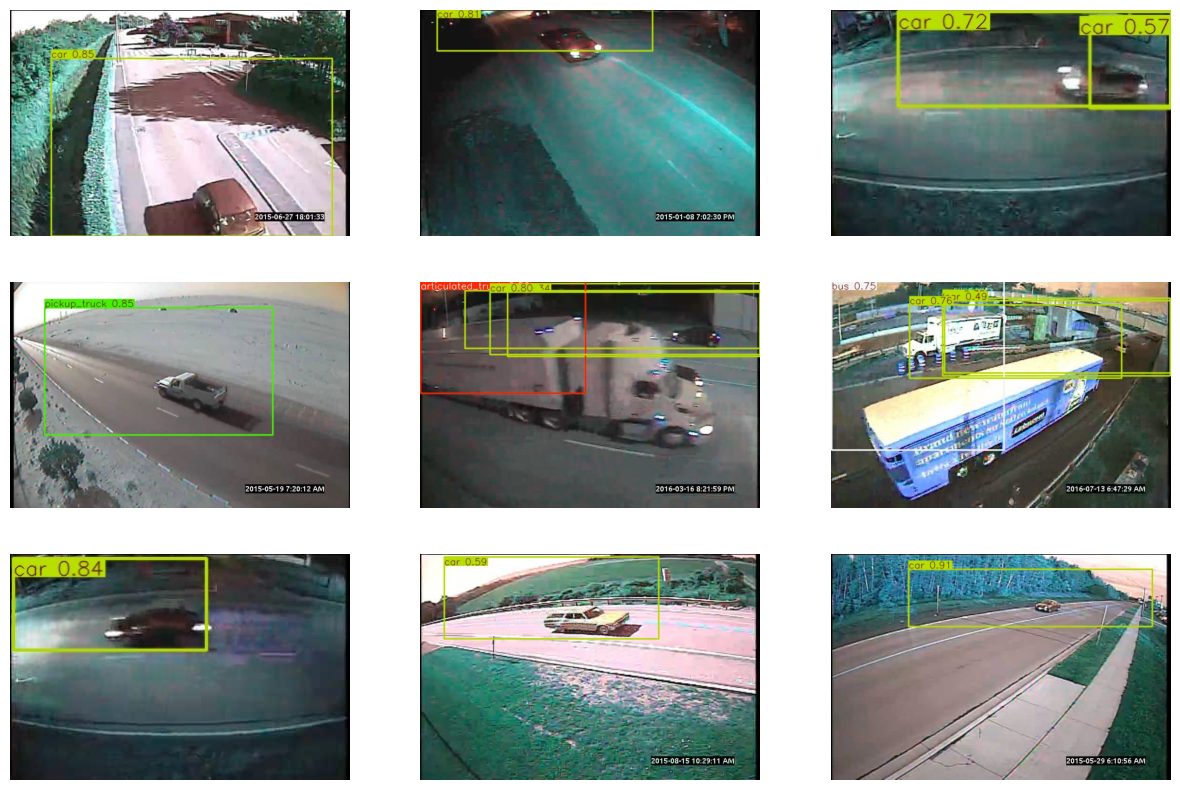

In [30]:
# visualize images with predicted bounding boxes and classes
import cv2
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for index, img in enumerate(infer_images):
    ax = plt.subplot(3, 3, index + 1)
    image = cv2.imread(img)
    plt.imshow(image)
    ax.axis('off')  # Hide axes